# Get Accela access token

In [9]:
import requests
import pandas as pd

In [17]:
#Set body parameters to App and Accela information

data = {'client_id': '637695663724668394', #Application ID
        'client_secret': '342b6fc9f76f49db993230d55511097f', #Application Secret ID
        'grant_type': 'password', #Security type
        'username': '******', #My username
        'password': '******', #My password
        'scope': 'parcels', #Scope of API Call
        'agency_name': 'UG', #Accela Agency Name
        'environment': 'TEST'} # Type of environment (PROD, TEST ect.)

#Use POST method for authentication URL, data = the parameters above
token_response = requests.post('https://auth.accela.com/oauth2/token', data = data) 

#Print status code of call (200 is good, all others are an error)
print("Status Code")
print(token_response.status_code)

#Print call return
print(token_response.text)

Status Code
200
{"access_token":"-xxOQzUj1N2wS_nJnpQncuOpBxMELY1YLRiHgzLSXSH7d1tLE_4bw6pY68ZkePYPg9GLn1SgA3BiCqfJf-GC15czWQ_QefMGvKnqsotp0wiZTsk5-Ap87NO6kidc29W3XH4un3WBe8b3aIfFkPx_NIFvqZGzb2uxTjFUkXXEHzqD9bmJ1g0u1T8gh4pnBz4LDDEVpCmMdWth0-hHs7R6KFvz68oJJ3cpXboE44nmGf0Ov1QzJyCz7MTCxxekl_SlSIfL3Evtp_G6RORywiPK_dsce1gMraK8II5Hfm0i8s-7sEC3jflWxl1lYNzxSujy1zSCddIWKpY35z-wjTrIZuLzeWwtMVWblgQ2ix3jKKmkTHXCX4qe3OWiiB9bkAvdxVc7IHshzU_QuyTwt09YIg2","token_type":"bearer","expires_in":86399,"refresh_token":"t2Ea0OZM63rCuXf0JNCjlDQEMsGySpjqBKMEy_St4h97VQWJuqn8K9veDpQz-INTtpzFPRrFNFks30ngjJpgfaNz7sSTHQVBp-q1d4LbB2-Emsf06LjjOIUu8RQeW_jBxAoMxHJv3LXgzeXEk14LSoHWyFjIdswdpyopwKXTxuZb2l_H3bPigG-oPJA2T4Fp1zmsvh447H4KCE1VfBqlV94xkuVNii5D7j9j8W6Axr36suzp0SitSk-Uy14aBDYjW3lJGunSCqr_az1XOtUvc0mb_nOSe4n8rhxfBMZRX2fmk2YUM4_OJ9s8uj0o7ivrd4iE2pfUbknWjZmFPFq2Iv2KoNEv9t1JjGUpsEqh9zC9BxklcmslESv13tK2KacwH58SDcR1p5dK6cIdbBjK82HSkouYXBJpF250jHTRqpY1","scope":"records"}


In [18]:
#Split call return based on a single double quote (need to use \ for this). Select third element which is the token info.
token = token_response.text.split("\"")[3]
token

'-xxOQzUj1N2wS_nJnpQncuOpBxMELY1YLRiHgzLSXSH7d1tLE_4bw6pY68ZkePYPg9GLn1SgA3BiCqfJf-GC15czWQ_QefMGvKnqsotp0wiZTsk5-Ap87NO6kidc29W3XH4un3WBe8b3aIfFkPx_NIFvqZGzb2uxTjFUkXXEHzqD9bmJ1g0u1T8gh4pnBz4LDDEVpCmMdWth0-hHs7R6KFvz68oJJ3cpXboE44nmGf0Ov1QzJyCz7MTCxxekl_SlSIfL3Evtp_G6RORywiPK_dsce1gMraK8II5Hfm0i8s-7sEC3jflWxl1lYNzxSujy1zSCddIWKpY35z-wjTrIZuLzeWwtMVWblgQ2ix3jKKmkTHXCX4qe3OWiiB9bkAvdxVc7IHshzU_QuyTwt09YIg2'

# Call Accela API

In [19]:
#Set host equal to base url for Accela API
host = 'https://apis.accela.com'

#Set dataset equal to the type of data you want. In this case it is records.
dataset = 'v4/parcels?isPrimary=Y'

#Join host and dataset with \
base_url = '/'.join([host,dataset])

#Output of joined variables host and dataset
base_url

'https://apis.accela.com/v4/parcels?isPrimary=Y'

In [15]:
#Set basic parameters for the call
parameters = {
        'grant_type': 'password', #Security type
        'client_id': '637695663724668394', #Application ID
        'client_secret': '342b6fc9f76f49db993230d55511097f', #Application Secret ID
        'username': '*****', #My username
        'password': '*****', #My password
        'scope': 'parcels', #Scope of API Call
        'agency_name': 'UG', #Accela Agency Name
        'environment': '****',
        'limit': '50'
    }

#Set header to the token that was called above
token_header = {
        'Authorization': token
    }


#Call api for data based on parameters and token header
response = requests.get(base_url,params = parameters, headers = token_header).json()

print(response['status'])

200


In [16]:
df = pd.DataFrame(response["result"])
df

,page,censusTract,tract,mapNumber,mapReferenceInfo,legalDescription,book,parcelNumber,councilDistrict,id,isPrimary,status,landValue,improvedValue
0,0789,44805,122307,G07,650,"BEG 1708FT E OF NW COR; S11W-698.39FT, E 1205...",2012,65001,7,65001,Y,"{'value': 'A', 'text': 'Active'}",NaN,NaN
1,0054,44803,102305,A05,657,58-6 BEG 646.21FT W OF SE COR OF SW1/4; W 410....,3357,65706,5,65706,Y,"{'value': 'A', 'text': 'Active'}",NaN,NaN
2,0714,44803,102305,A05,657,NaN,3883,65707,5,65707,Y,"{'value': 'A', 'text': 'Active'}",NaN,NaN
3,0437,44803,102305,A05,658,NaN,3962,65801,5,65801,Y,"{'value': 'A', 'text': 'Active'}",21520.0,NaN
4,0692,44803,102304,A04,659,162A E1/2 OF SW1/4 CONTG 11.5AC M/L,3685,65901,5,65901,Y,"{'value': 'A', 'text': 'Active'}",NaN,NaN
5,1608,44803,102304,A04,660,W1/2 LOT 3 SE1/4 LS N 40FT; ALSO 9-10-23: NW...,2017,66000,5,66000,Y,"{'value': 'A', 'text': 'Active'}",89730.0,23170.0
6,0363,44804,102303,A03,661,"158,159 W 6.7AC OF SW FRAC 1/4",2859,66100,5,66100,Y,"{'value': 'A', 'text': 'Active'}",NaN,NaN
7,0363,44804,102303,A03,661,"158,159-1 E 6.5AC OF W 13.24AC OF SW FRAC 1/4",2859,66102,5,66102,Y,"{'value': 'A', 'text': 'Active'}",NaN,NaN
8,0699,44804,102303,A03,662,"2,3 LOT 3, SE FRAC 1/4 W OF 107TH ST LS R/W",2334,66200,5,66200,Y,"{'value': 'A', 'text': 'Active'}",1000.0,NaN
9,,44804,102302,A02,663,"1 LOT 4, SW FRAC 1/4 S OF WOLCOTT DR & LOT 3, ...",,66300,5,66300,Y,"{'value': 'A', 'text': 'Active'}",1080.0,NaN


In [11]:
#To iterate over api calls we need to increase offset by 1000 so we get unique records

#start offset at 0
offset = 0

#offset_stop is the number of rows of data that will be called
offset_stop = 2000

parameters = {
        'grant_type': 'password', #Security type
        'client_id': '637695663724668394', #Application ID
        'client_secret': '342b6fc9f76f49db993230d55511097f', #Application Secret ID
        'username': 'NREBOVICH', #My username
        'password': '#Test12345', #My password
        'scope': 'parcels', #Scope of API Call
        'agency_name': 'UG', #Accela Agency Name
        'environment': 'TEST',
        'limit': '1000'
    }

    #Set header to the token that was called above
token_header = {
            'Authorization': token
        }


    #Call api for data based on parameters and token header
response = requests.get(url,params = parameters, headers = token_header).json()
    
print('API Status')
print(response['status'])
    
    #Convert API response data into pandas dataframe
df = pd.DataFrame(response["result"])
    
    
    #Loop over calls until there is no more data (hasmore == False)
    #Each loop calls the next 1000 rows of data
while response['page']['hasmore'] == True:
#offset should equal limit in parameters
    offset += 1000
#convert offset to string so it can be used in parameters below
    offset_str = str(offset)
    parameters = {
            'grant_type': 'password', #Security type
            'client_id': '637695663724668394', #Application ID
            'client_secret': '342b6fc9f76f49db993230d55511097f', #Application Secret ID
            'username': 'NREBOVICH', #My username
            'password': '#Test12345', #My password
            'scope': 'parcels', #Scope of API Call
            'agency_name': 'UG', #Accela Agency Name
            'environment': 'TEST', #environment
            'offset': offset_str, #offset increases by 1000 each loop
            'limit': '1000' #maximum number of rows returned for each call
        }

    response_2 = requests.get(url,params = parameters, headers = token_header).json() #API call for each loop
    print(int((offset/offset_stop) * 100), "%") #Gives percent of rows called out of total
    df2 = pd.DataFrame(response_2["result"]) #convert call data into pandas dataframe
    df = df.append(df2) #append new row data into original call data in pandas dataframe
    if offset == offset_stop: #stops loop when offset equals total rows the you want to call in offset_stop
        break

print('API Status')
print(response_2['status'])

API Status
200
50 %
100 %
API Status
200


In [21]:
#To iterate over api calls we need to increase offset by 1000 so we get unique records

def call_api(offset_stop): #offset_stop is the number of rows of data that will be called
#start offset at 0
    offset = 0

    parameters = {
        'grant_type': 'password', #Security type
        'client_id': '637695663724668394', #Application ID
        'client_secret': '342b6fc9f76f49db993230d55511097f', #Application Secret ID
        'username': '*****', #My username
        'password': '********', #My password
        'scope': 'get_records', #Scope of API Call
        'agency_name': 'UG', #Accela Agency Name
        'environment': '****',
        'limit': '1000'
        }

    #Set header to the token that was called above
    token_header = {
            'Authorization': token
            }


    #Call api for data based on parameters and token header
    response = requests.get(base_url,params = parameters, headers = token_header).json()

    
    #Convert API response data into pandas dataframe
    df = pd.DataFrame(response["result"])
    
    
    #Loop over calls until there is no more data (hasmore == False)
    #Each loop calls the next 1000 rows of data
    while response['page']['hasmore'] == True:
    #offset should equal limit in parameters
        offset += 1000
    #convert offset to string so it can be used in parameters below
        offset_str = str(offset)
        parameters = {
            'grant_type': 'password', #Security type
            'client_id': '637695663724668394', #Application ID
            'client_secret': '342b6fc9f76f49db993230d55511097f', #Application Secret ID
            'username': '******', #My username
            'password': '*******', #My password
            'scope': 'get_records', #Scope of API Call
            'agency_name': 'UG', #Accela Agency Name
            'environment': 'TEST', #environment
            'offset': offset_str, #offset increases by 1000 each loop
            'limit': '1000' #maximum number of rows returned for each call
            }

        response_2 = requests.get(base_url,params = parameters, headers = token_header).json() #API call for each loop
        print(int((offset/offset_stop) * 100), "%") #Gives percent of rows called out of total
        df2 = pd.DataFrame(response_2["result"]) #convert call data into pandas dataframe
        df = df.append(df2) #append new row data into original call data in pandas dataframe
        if offset == offset_stop: #stops loop when offset equals total rows the you want to call in offset_stop
            print('\n')
            print('API Status')
            print(response_2['status'])
            break

In [22]:
call_api(2000)

50 %
100 %


API Status
200


In [124]:
for col in df.columns:
    print(col)

id
type
module
recordClass
undistributedCost
status
updateDate
reportedDate
createdBy
initiatedProduct
serviceProviderCode
customId
statusDate
trackingId
jobValue
openedDate
totalJobCost
value
totalFee
totalPay
balance
booking
infraction
misdemeanor
offenseWitnessed
defendantSignature
publicOwned
name
createdByCloning
actualProductionUnit
estimatedProductionUnit
reportedChannel
description
numberOfBuildings
housingUnits
shortNotes
scheduledDate
assignedUser
assignedToDepartment
inspectorDepartment
inspectorName
closedDate
closedByDepartment
closedByUser
completedDate
completedByUser
completedByDepartment
assignedDate
constructionType


In [125]:
df_enforce = df[df['module'] == 'Enforce']

In [133]:
df['updateDate']= pd.to_datetime(df['updateDate'])
df['reportedDate']= pd.to_datetime(df['reportedDate'])
df['statusDate']= pd.to_datetime(df['statusDate'])
df['scheduledDate']= pd.to_datetime(df['scheduledDate'])
df['closedDate']= pd.to_datetime(df['closedDate'])
df['completedDate']= pd.to_datetime(df['completedDate'])
df['assignedDate']= pd.to_datetime(df['assignedDate'])

In [127]:
data_nulls = pd.isnull(df_enforce).sum()/len(df_enforce['id'])
data_nulls.sort_values(ascending=False)

constructionType          1.00
shortNotes                1.00
completedDate             1.00
completedByDepartment     1.00
completedByUser           1.00
assignedDate              1.00
createdByCloning          1.00
closedByUser              0.96
numberOfBuildings         0.81
housingUnits              0.81
closedByDepartment        0.80
closedDate                0.80
name                      0.65
assignedUser              0.43
assignedToDepartment      0.42
estimatedProductionUnit   0.41
actualProductionUnit      0.41
inspectorName             0.39
inspectorDepartment       0.39
description               0.33
reportedChannel           0.23
reportedDate              0.23
scheduledDate             0.13
status                    0.01
recordClass               0.00
publicOwned               0.00
id                        0.00
defendantSignature        0.00
type                      0.00
module                    0.00
undistributedCost         0.00
updateDate                0.00
createdB

In [160]:
example['statusDate']
#example['createdBy']

1     2021-10-11 13:38:22
22    2021-08-12 14:50:24
23    2021-08-12 14:45:37
24    2021-08-12 00:00:00
25    2021-08-12 12:39:46
Name: statusDate, dtype: object

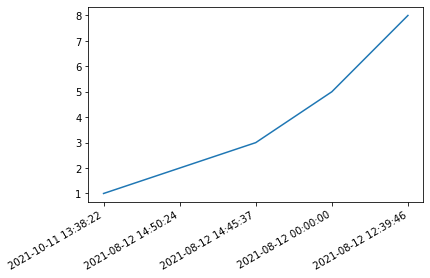

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

date_time = ["2021-01-01", "2021-01-02", "2021-01-03"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3, 5, 8]

DF = pd.DataFrame()
DF['value'] = data
DF = DF.set_index(example['statusDate'])
plt.plot(example['statusDate'], data)
plt.gcf().autofmt_xdate()
plt.show()

In [85]:
data_nulls = pd.isnull(df).sum()/len(df['id'])
data_nulls.sort_values(ascending=False)

completedDate              0.999905
assignedDate               0.999714
constructionType           0.997667
assignedUser               0.969048
assignedToDepartment       0.969000
completedByUser            0.941857
completedByDepartment      0.941714
createdByCloning           0.940095
shortNotes                 0.920810
inspectorName              0.919286
inspectorDepartment        0.918905
actualProductionUnit       0.868714
estimatedProductionUnit    0.868714
scheduledDate              0.862857
closedByUser               0.859810
closedDate                 0.785667
closedByDepartment         0.785667
name                       0.305714
housingUnits               0.286810
numberOfBuildings          0.286810
description                0.239476
reportedChannel            0.125952
reportedDate               0.113095
recordClass                0.034810
status                     0.013238
createdBy                  0.000762
initiatedProduct           0.000048
id                         0

In [ ]:
df.dtypes

In [88]:
df['updateDate']= pd.to_datetime(df['updateDate'])
df['reportedDate']= pd.to_datetime(df['reportedDate'])
df['statusDate']= pd.to_datetime(df['statusDate'])
df['scheduledDate']= pd.to_datetime(df['scheduledDate'])
df['closedDate']= pd.to_datetime(df['closedDate'])
df['completedDate']= pd.to_datetime(df['completedDate'])
df['assignedDate']= pd.to_datetime(df['assignedDate'])

In [89]:
df.dtypes

id                                 object
type                               object
module                             object
recordClass                        object
undistributedCost                 float64
status                             object
updateDate                 datetime64[ns]
reportedDate               datetime64[ns]
createdBy                          object
initiatedProduct                   object
serviceProviderCode                object
customId                           object
statusDate                 datetime64[ns]
trackingId                          int64
jobValue                          float64
openedDate                         object
totalJobCost                      float64
value                              object
totalFee                          float64
totalPay                          float64
balance                           float64
booking                              bool
infraction                           bool
misdemeanor                       

In [101]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,undistributedCost,trackingId,jobValue,totalJobCost,totalFee,totalPay,balance,actualProductionUnit,estimatedProductionUnit,numberOfBuildings,housingUnits
count,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,2757.00,2757.00,14977.00,14977.00
mean,0.00,419049585576.54,36857.15,0.00,210.70,177.12,33.70,0.00,0.00,0.08,0.20
std,0.00,28987740.42,2232219.11,0.00,9157.23,9148.86,297.56,0.00,0.00,0.30,14.73
min,0.00,419000002144.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,419024441118.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,419049404911.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,419074951007.00,0.00,0.00,58.88,41.50,0.00,0.00,0.00,0.00,0.00
max,0.00,419099994744.00,300000000.00,0.00,1201105.00,1201105.00,30269.00,0.00,0.00,15.00,1800.00


In [94]:
import matplotlib.dates as mdates

In [90]:
df.head()

,id,type,module,recordClass,undistributedCost,status,updateDate,reportedDate,createdBy,initiatedProduct,...,inspectorDepartment,inspectorName,closedDate,closedByDepartment,closedByUser,completedDate,completedByUser,completedByDepartment,assignedDate,constructionType
0,UG-21CAP-00000-0008V,"{'module': 'PublicWorks', 'value': 'PublicWork...",PublicWorks,COMPLETE,0.0,"{'value': 'Open', 'text': 'Open'}",2021-10-11 08:40:31,2021-10-11 08:33:54,PUBLICUSER2042,ACA,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1,UG-21299-00000-00008,"{'module': 'Enforce', 'value': 'Enforce/Code A...",Enforce,COMPLETE,0.0,"{'value': 'Open', 'text': 'Open'}",2021-10-11 13:38:22,NaT,JRAMIREZ,EMSE,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2,UG-21CAP-00000-0008S,"{'module': 'PublicWorks', 'value': 'PublicWork...",PublicWorks,NaN,0.0,"{'value': 'Open', 'text': 'Open'}",2021-09-30 16:59:55,2021-09-30 16:59:55,JRAMIREZ,AV360,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
3,UG-21CAP-00000-0008T,"{'module': 'PublicWorks', 'value': 'PublicWork...",PublicWorks,NaN,0.0,"{'value': 'Open', 'text': 'Open'}",2021-09-30 16:59:56,2021-09-30 16:59:56,JRAMIREZ,AV360,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
4,UG-21CAP-00000-0008U,"{'module': 'PublicWorks', 'value': 'PublicWork...",PublicWorks,NaN,0.0,"{'value': 'Open', 'text': 'Open'}",2021-09-30 16:59:56,2021-09-30 16:59:57,JRAMIREZ,AV360,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
